In [34]:
# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [35]:
# Uploading file
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [36]:
# Creating Dataframe
df = pd.read_excel("AdventureWorks.xlsx")

In [37]:
# Showing the first five lines
df.head()

,date_sale,date_shipping,id_store,id_product,id_client,id_sale,cost,price,amount,discount,sale_value,product,manufacturer,brand,class,color
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [38]:
# Amount of lines e columns
df.shape

(904, 16)

In [39]:
# Showing the type of data
df.dtypes

date_sale        datetime64[ns]
date_shipping    datetime64[ns]
id_store                  int64
id_product                int64
id_client                 int64
id_sale                  object
cost                    float64
price                   float64
amount                    int64
discount                float64
sale_value              float64
product                  object
manufacturer             object
brand                    object
class                    object
color                    object
dtype: object

In [40]:
# Showing the revenue 
df["sale_value"].sum()

5984606.1426

In [41]:
# Creating the amount cost column 
df["amount_cost"] = df["cost"].mul(df["amount"])

In [42]:
# Showing the new column
df.head(5)

,date_sale,date_shipping,id_store,id_product,id_client,id_sale,cost,price,amount,discount,sale_value,product,manufacturer,brand,class,color,amount_cost
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


In [43]:
# Amount cost
round(df["cost"].sum(), 2)

245893.56

In [44]:
# Calculating the profit
df["profit"] = df["sale_value"] - df["cost"]

In [45]:
df.head(5)

,date_sale,date_shipping,id_store,id_product,id_client,id_sale,cost,price,amount,discount,sale_value,product,manufacturer,brand,class,color,amount_cost,profit
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42"
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42"
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42"
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42"
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42"


In [46]:
# Amount profit
round(df["profit"].sum(),2)

5738712.58

In [47]:
# Showing types of data
df.dtypes

date_sale        datetime64[ns]
date_shipping    datetime64[ns]
id_store                  int64
id_product                int64
id_client                 int64
id_sale                  object
cost                    float64
price                   float64
amount                    int64
discount                float64
sale_value              float64
product                  object
manufacturer             object
brand                    object
class                    object
color                    object
amount_cost             float64
profit                  float64
dtype: object

In [48]:
# Calculating shipping time in days
df["sending_time"] = (df["date_shipping"] - df["date_sale"]).dt.days

In [49]:
# Showing sending time column
df.head(1)

,date_sale,date_shipping,id_store,id_product,id_client,id_sale,cost,price,amount,discount,sale_value,product,manufacturer,brand,class,color,amount_cost,profit,sending_time
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42",20


In [50]:
# Checking column data type
df["sending_time"].dtype

dtype('int64')

In [51]:
# Average shipping time by brand
df.groupby("brand")["sending_time"].mean()

brand
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: sending_time, dtype: float64

In [52]:
# Checking empty fields
df.isnull().sum()

date_sale        0
date_shipping    0
id_store         0
id_product       0
id_client        0
id_sale          0
cost             0
price            0
amount           0
discount         0
sale_value       0
product          0
manufacturer     0
brand            0
class            0
color            0
amount_cost      0
profit           0
sending_time     0
dtype: int64

In [53]:
# Grouping data by year and brand
df.groupby([df["date_sale"].dt.year, "brand"])["profit"].sum()

date_sale  brand          
2008       Adventure Works             587,248.06
           Contoso                     130,490.77
           Fabrikam                  2,339,704.29
2009       Adventure Works             786,393.02
           Contoso                     319,030.30
           Fabrikam                  1,575,846.14
Name: profit, dtype: float64

In [54]:
# Setting float values
pd.options.display.float_format = '{:20,.2f}'.format

In [55]:
# Resetting index
profit_year = df.groupby([df["date_sale"].dt.year, "brand"])["profit"].sum().reset_index()
profit_year

,date_sale,brand,profit
0,2008,Adventure Works,"587,248.06"
1,2008,Contoso,"130,490.77"
2,2008,Fabrikam,"2,339,704.29"
3,2009,Adventure Works,"786,393.02"
4,2009,Contoso,"319,030.30"
5,2009,Fabrikam,"1,575,846.14"


In [56]:
# Amount of products sold
df.groupby("product")["amount"].sum().sort_values(ascending=False)

product
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: amount, dtype: int64

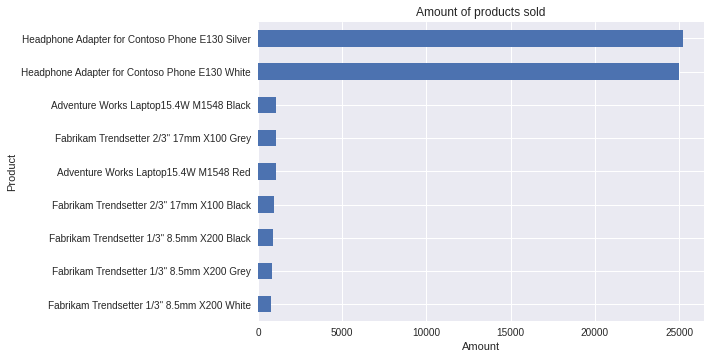

In [57]:
# Plotting amount of products sold
df.groupby("product")["amount"].sum().sort_values(ascending=True).plot.barh(title="Amount of products sold")
plt.xlabel("Amount")
plt.ylabel("Product");

In [59]:
# Showing profit by year
df.groupby(df["date_sale"].dt.year)["profit"].sum()

date_sale
2008           3,057,443.12
2009           2,681,269.46
Name: profit, dtype: float64

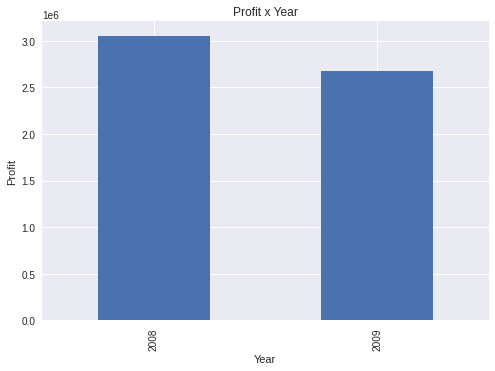

In [65]:
# Plotting amount profit vs year
df.groupby(df["date_sale"].dt.year)["profit"].sum().plot.bar(title="Profit x Year")
plt.xlabel("Year")
plt.ylabel("Profit");

In [86]:
df_2009 = df[df["date_sale"].dt.year == 2009]

In [87]:
df_2009.head(5)

,date_sale,date_shipping,id_store,id_product,id_client,id_sale,cost,price,amount,discount,sale_value,product,manufacturer,brand,class,color,amount_cost,profit,sending_time
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42",4


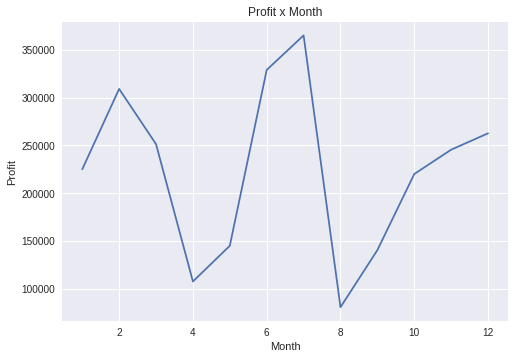

In [83]:
df_2009.groupby(df_2009["date_sale"].dt.month)["profit"].sum().plot(title="Profit x Month")
plt.xlabel("Month")
plt.ylabel("Profit");

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

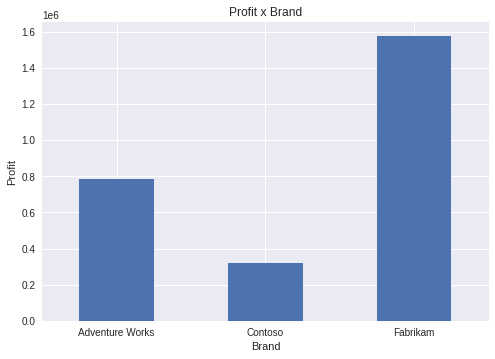

In [84]:
df_2009.groupby("brand")["profit"].sum().plot.bar(title="Profit x Brand")
plt.xlabel("Brand")
plt.ylabel("Profit");
plt.xticks(rotation='horizontal')

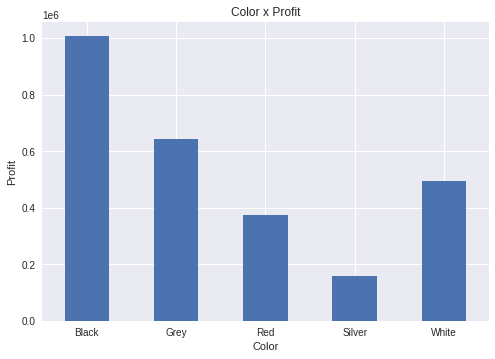

In [85]:
df_2009.groupby("color")["profit"].sum().plot.bar(title="Color x Profit")
plt.xlabel("Color")
plt.ylabel("Profit");
plt.xticks(rotation='horizontal');

In [71]:
df["sending_time"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: sending_time, dtype: float64

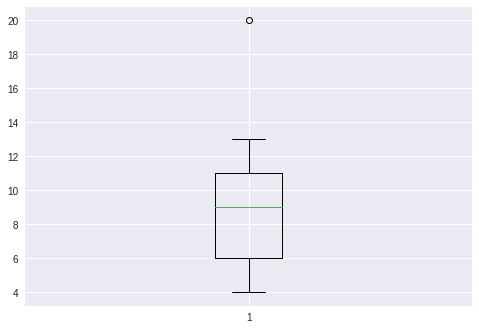

In [72]:
# Plotting a Boxplot
plt.boxplot(df["sending_time"]);

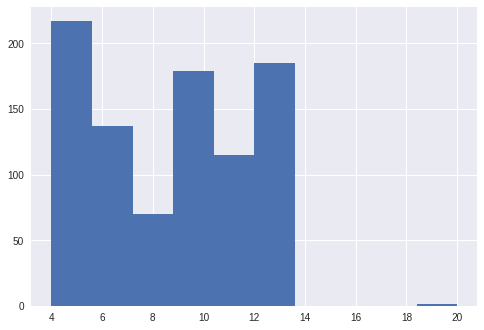

In [73]:
# Plotting a histogram
plt.hist(df["sending_time"]);

In [74]:
# Minimum shipping time
df["sending_time"].min()

4

In [75]:
# Maximum shipping time
df["sending_time"].max()

20

In [76]:
# Identify the Outlier
df[df["sending_time"] == 20]

,date_sale,date_shipping,id_store,id_product,id_client,id_sale,cost,price,amount,discount,sale_value,product,manufacturer,brand,class,color,amount_cost,profit,sending_time
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","4,199.42",20
